# Central Tendency

In the last notebook I prepared the MoMA dataset. Now it's ready to help us answer some questions about distributions:
- How old are artworks (i.e., how many years have they been completed) when MoMA acquires them?
- For artists who are alive when their work is acquired, how old do they tend to be at acquisition?
- For artists no longer living when their work is acquired, how many years posthumously does work tend to be acquired?

In [1]:
# Standard imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Dataset utils
import art_stats_utils

In [2]:
# Read data
df = pd.read_csv('../data/moma/Artworks.csv')

# Prepare data
df = art_stats_utils.prepare_dataset(df)

# Identify relevant columns
cols = [
    'Title', 'Artist', 'BeginDate', 'EndDate', 'Date', 
    'DateAcquired', 'year_acquired', 'date_stripped', 
    'begun_year', 'completed_year', 'birth_year', 
    'death_year', 'artwork_age', 'living', 'artist_age', 
    'years_posthumous'
]

df[cols].head()

,Title,Artist,BeginDate,EndDate,Date,DateAcquired,year_acquired,date_stripped,begun_year,completed_year,birth_year,death_year,artwork_age,living,artist_age,years_posthumous
0,"Ferdinandsbrücke Project, Vienna, Austria (Ele...",Otto Wagner,(1841),(1918),1896,1996-04-09,1996.0,1896,1896.0,1896.0,1841.0,1918.0,100.0,0,NaN,78.0
1,"City of Music, National Superior Conservatory ...",Christian de Portzamparc,(1944),(0),1987,1995-01-17,1995.0,1987,1987.0,1987.0,1944.0,0.0,8.0,1,51.0,NaN
2,"Villa near Vienna Project, Outside Vienna, Aus...",Emil Hoppe,(1876),(1957),1903,1997-01-15,1997.0,1903,1903.0,1903.0,1876.0,1957.0,94.0,0,NaN,40.0
3,"The Manhattan Transcripts Project, New York, N...",Bernard Tschumi,(1944),(0),1980,1995-01-17,1995.0,1980,1980.0,1980.0,1944.0,0.0,15.0,1,51.0,NaN
4,"Villa, project, outside Vienna, Austria, Exter...",Emil Hoppe,(1876),(1957),1903,1997-01-15,1997.0,1903,1903.0,1903.0,1876.0,1957.0,94.0,0,NaN,40.0


In [3]:
# Establish palette
pink = '#FE5F55'
blue = '#208AAE'
green = '#18A999'

colors = [pink, blue, green]

mypalette = sns.set_palette(sns.color_palette(colors))
sns.color_palette(colors)

[(0.996078431372549, 0.37254901960784315, 0.3333333333333333),
 (0.12549019607843137, 0.5411764705882353, 0.6823529411764706),
 (0.09411764705882353, 0.6627450980392157, 0.6)]

## MoMA's Painting Collection

To simplify this data excursion, I'm going to focus on just paintings (or artworks classified as paintings, anyway), since that's a relatively straightforward category and usually doesn't involve complicated considerations--multiple artists, for instance, or complex date ranges.

In [4]:
# Filter dataset for paintings
paintings = df[df['Classification'] == 'Painting']

print("MoMA's collection contains {:,} paintings".format(len(paintings)))

MoMA's collection contains 2,384 paintings


According to this dataset, MoMA's collection contains 2,384 artworks classified as paintings, which strikes me as both a lot and fewer than expected: a lot since it's easy to imagine that the museum can only display a fraction of those at any given time, and the permanent painting collection (as far as I know) doesn't change too often; but fewer than expected since I suppose I would have assumed an institution like MoMA to acquire more than ~25 paintiners per year on average over the course of it's almost-100-year history. Then again 25 paintings a year is a lot!

Moving forward there are a few main questions I want to focus on:
- For painters who were alive at the time of acquisition, how old did those artists tend to be?
- For painters who were no longer living at the time of acquisition, on the other hand, how many years after that artist's death did the museum tend to wait?
- And regardless of whether or not the artist was alive at the time of acquisition, how old were their paintings when acquired?

## Using the Mean to Estimate Painter's Age at Acquisition

Let's look at how old painters tend to be when their work is acquired. Obviously this applies only painters who were alive when their work was acquired.

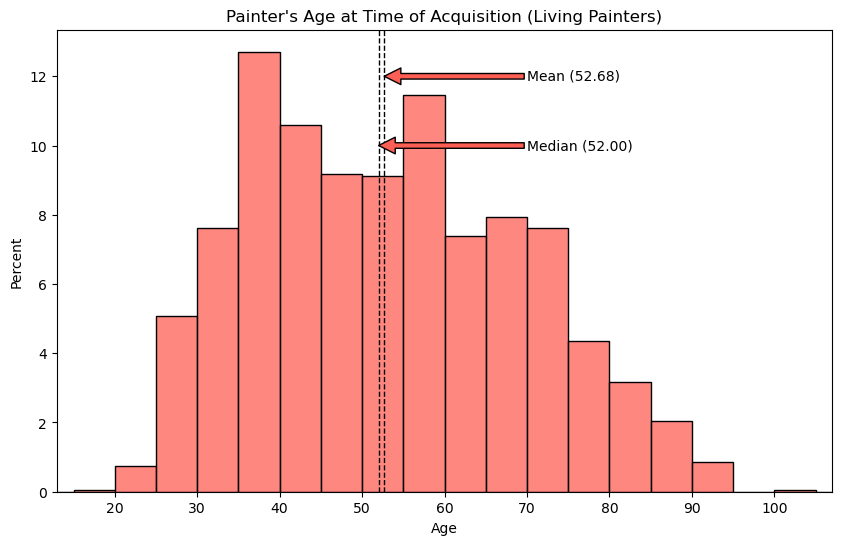

In [5]:
# Plot
fig, ax = plt.subplots(figsize=(10, 6))
sns.histplot(
    data=paintings,
    x='artist_age',
    color=pink,
    ax=ax,
    binwidth=5,
    binrange=(10, 110),
    stat='percent',
)

# Axis labels
ax.set_title('Painter\'s Age at Time of Acquisition (Living Painters)')
ax.set_xlabel('Age')
ax.set_xticks(range(0, 130, 10))
ax.set_xlim(13, 107)

# Mean line and annotation
mean = paintings['artist_age'].mean()
ax.axvline(mean, color='black', ls='--', lw=1)
ax.annotate(
    'Mean ({:.2f})'.format(mean), xy=(mean, 12), xycoords='data', xytext=(70, 12), 
    textcoords='data', arrowprops=dict(facecolor=pink, shrink=0),
    horizontalalignment='left', verticalalignment='center'
)

# Median line and annotation
median = paintings['artist_age'].median()
ax.axvline(median, color='black', ls='--', lw=1)
ax.annotate(
    'Median ({:.2f})'.format(median), xy=(median, 10), xycoords='data', xytext=(70, 10), 
    textcoords='data', arrowprops=dict(facecolor=pink, shrink=0),
    horizontalalignment='left', verticalalignment='center'
)

plt.savefig(fname='moma-painter-age-at-acquisition.png', dpi=150, bbox_inches='tight');

While visually it looks like there's too much variance for this sample to resemble a normal distribution (more on that in another post), this distribution certainly looks pretty symmetrical. As a result, one of the things we see is that the mean and median are very close. The mean age of a painter at the time his/her work was acquired by MoMA is 52.68 years old, and the median is 52 years old. This is an example where the simple mean does a pretty good job of representing the overall numbers and allows us to say that painters who are still living tend to be later career when their work is acquired.

(And that's interesting by the way! This gives us some indication of the museum's conservatism or risk aversion: when it buys paintings from living artists, it privileges work by those who have been working for 30+ years--much "safer" for an institution invested in the history of art to collect paintings by artists whose legacy is already well-established.)

## Using the Median to Estimate Years Elapsed from Artist's Death to Acquisition
For artists who were no longer living at the time their work was acquired, how much time has typically elapsed after the artist's death until the work's acquisition?

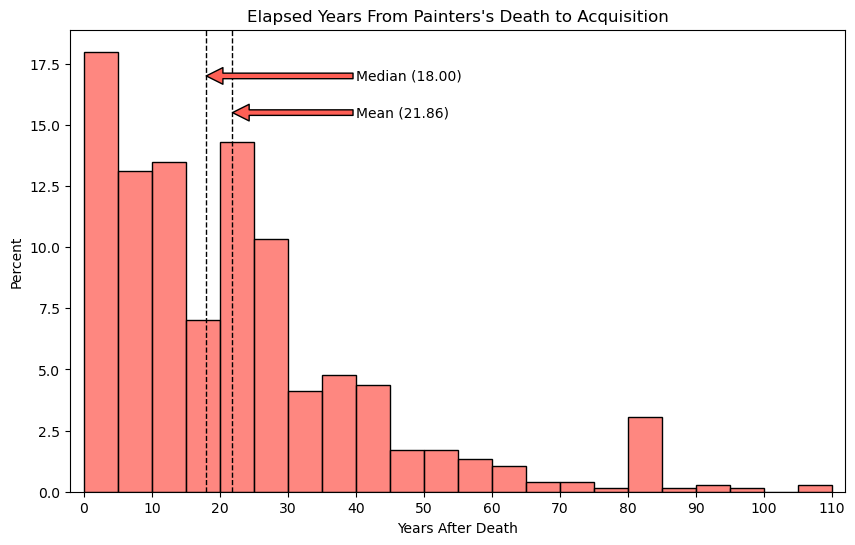

In [6]:
# Plot
fig, ax = plt.subplots(figsize=(10, 6))
sns.histplot(
    data=paintings,
    x='years_posthumous',
    color=pink,
    binwidth=5,
    binrange=(0, 110),
    stat='percent',
    ax=ax
)

# Axis labels
ax.set_title('Elapsed Years From Painters\'s Death to Acquisition')
ax.set_xlabel('Years After Death')
ax.set_xticks(range(0, 130, 10))
ax.set_xlim(-2, 112)

# Mean line and annotation
mean = paintings['years_posthumous'].mean()
ax.axvline(mean, color='black', ls='--', lw=1)
ax.annotate(
    'Mean ({:.2f})'.format(mean), xy=(mean, 15.5), xycoords='data', xytext=(40, 15.5), 
    textcoords='data', arrowprops=dict(facecolor=pink, shrink=0),
    horizontalalignment='left', verticalalignment='center'
)

# Median line and annotation
median = paintings['years_posthumous'].median()
ax.axvline(median, color='black', ls='--', lw=1)
ax.annotate(
    'Median ({:.2f})'.format(median), xy=(median, 17), xycoords='data', xytext=(40, 17), 
    textcoords='data', arrowprops=dict(facecolor=pink, shrink=0),
    horizontalalignment='left', verticalalignment='center'
)

plt.savefig(fname='moma-posthumous-years-at-acquisition.png', dpi=150, bbox_inches='tight');

This is a very differnt-looking distribution. We'd describe it as positively skewed, meaning that it has a tail to the right which has the effect of pulling the mean in the positive direction. Here the mean number of years after an artist has passed until the museum acquires a painting is 21.86 years. The median value, however, is 18 years.

Now, we can see by looking at this that there are very few examples of paintings that were acquired 70, 80, 90, 100 years after an artist has died. In fact, it's quite common for paintings to be acquired not long after an artist's death: about 17.5% of such acquisitions occur within 5 years, about 30% within 10, about 43% within 15. And actually, since the median is the value that's exactly at thd halfway point, we can say definitively that 50% of all painting acquisitions made after the artist's death occurred within 18 years, whereas the other half of such acquisitions fall somewhere between 18 and 110 years.

Because of this clustering of values on the left, the median would be a better and more robust representation of the central tendency here--robust meaning that it is less vulnerable to the outliers that we see on the right-hand side of the distribution, which, unlike the median, bias the mean in their direction. One can imagine an extreme scenario where MoMA, for some reason, acquires a medieval altarpiece--1,000 years, let's say, after the artist's death. This new datapoint would pull the mean up even higher, whereas the median would stay right where it is.

## A Few More Illustrations of Mean and Median: Artwork Age at Acquisition
I was also curious to look at artwork age at the time of acquisition--how new or old do paintings tend to be (that is, how many years after they were completed) when the museum buyst them?

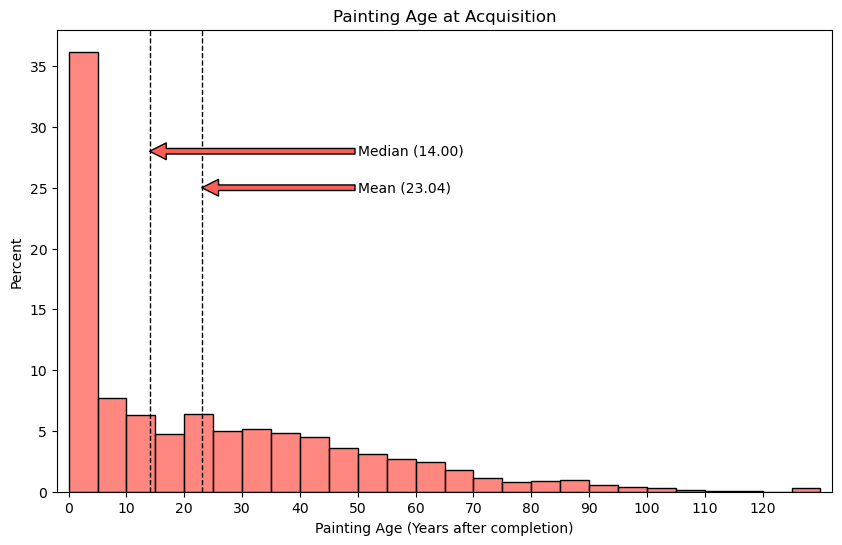

In [7]:
# Plot
fig, ax = plt.subplots(figsize=(10, 6))
sns.histplot(
    data=paintings,
    x='artwork_age',
    binwidth=5,
    binrange=(0, 130),
    stat='percent',
    ax=ax
)

# Axis labels
ax.set_title('Painting Age at Acquisition')
ax.set_xlabel('Painting Age (Years after completion)')
ax.set_xticks(range(0, 130, 10))
ax.set_xlim(-2, 132)

# Mean line and annotation
mean = paintings['artwork_age'].mean()
ax.axvline(mean, color='black', ls='--', lw=1)
ax.annotate(
    'Mean ({:.2f})'.format(mean), xy=(mean, 25), xycoords='data', xytext=(50, 25), 
    textcoords='data', arrowprops=dict(facecolor=pink, shrink=0),
    horizontalalignment='left', verticalalignment='center'
)

# Median line and annotation
median = paintings['artwork_age'].median()
ax.axvline(median, color='black', ls='--', lw=1)
ax.annotate(
    'Median ({:.2f})'.format(median), xy=(median, 28), xycoords='data', xytext=(50, 28), 
    textcoords='data', arrowprops=dict(facecolor=pink, shrink=0),
    horizontalalignment='left', verticalalignment='center'
)

plt.savefig(fname='moma-painting-age-at-acquisition.png', dpi=150, bbox_inches='tight');

This is an even more positively skewed distribution than the last one. 35% of the time, paintings are less than 5 years old when acquired--that's pretty new! And because the median is 14 years, we can say that half the time paintings are less than 14 years old when acquired. The other half of the time they're somewhere between 14 and 130 years old. But because of the positive skew, the mean painting age is 23 years, which is clearly a less effective value for representing the central tendency here.

This is an interesting counterpoint to the artist age chart above, since it suggests that even while the museum tended toward conservatism in purchasing works from well-established, mid- to -late career artists, it also focused on new works. Which makes sense, as well: One an artist's and his/her legacy is established, then it's safe to expand the collection with new and recent works.

As one final question, let's see how this question of artwork age breaks down by whether or not the artist was alive at the time of acquisition.

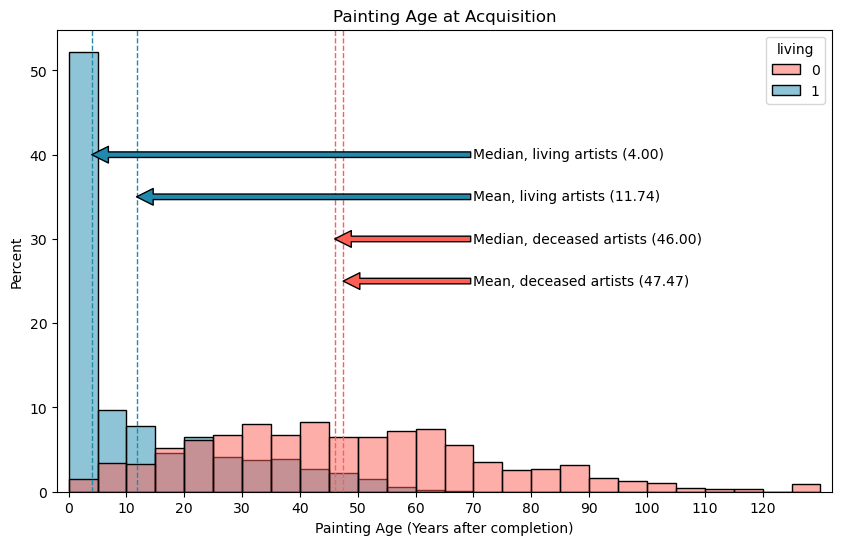

In [8]:
# Mask
living = (paintings['living'] == 1)

# Plot
fig, ax = plt.subplots(figsize=(10, 6))
sns.histplot(
    data=paintings,
    x='artwork_age',
    hue='living',
    binwidth=5,
    binrange=(0, 130),
    stat='percent',
    common_norm=False,
    ax=ax
)


# Axis labels
ax.set_title('Painting Age at Acquisition')
ax.set_xlabel('Painting Age (Years after completion)')
ax.set_xticks(range(0, 130, 10))
ax.set_xlim(-2, 132)

# Living artists: mean and median lines and annotations
mean_living = paintings[living]['artwork_age'].mean()
ax.axvline(mean_living, color=blue, ls='--', lw=1)
ax.annotate(
    'Mean, living artists ({:.2f})'.format(mean_living), xy=(mean_living, 35), 
    xycoords='data', xytext=(70, 35), 
    textcoords='data', arrowprops=dict(facecolor=blue, shrink=0),
    horizontalalignment='left', verticalalignment='center'
)

median_living = paintings[living]['artwork_age'].median()
ax.axvline(median_living, color=blue, ls='--', lw=1)
ax.annotate(
    'Median, living artists ({:.2f})'.format(median_living), xy=(median_living, 40), 
    xycoords='data', xytext=(70, 40), 
    textcoords='data', arrowprops=dict(facecolor=blue, shrink=0),
    horizontalalignment='left', verticalalignment='center'
)

# Deceased artists: mean and median lines and annotations
mean_deceased = paintings[~living]['artwork_age'].mean()
ax.axvline(mean_deceased, color=pink, ls='--', lw=1)
ax.annotate(
    'Mean, deceased artists ({:.2f})'.format(mean_deceased), xy=(mean_deceased, 25), 
    xycoords='data', xytext=(70, 25), 
    textcoords='data', arrowprops=dict(facecolor=pink, shrink=0),
    horizontalalignment='left', verticalalignment='center'
)

median_deceased = paintings[~living]['artwork_age'].median()
ax.axvline(median_deceased, color=pink, ls='--', lw=1)
ax.annotate(
    'Median, deceased artists ({:.2f})'.format(median_deceased), xy=(median_deceased, 30),
    xycoords='data', xytext=(70, 30), 
    textcoords='data', arrowprops=dict(facecolor=pink, shrink=0),
    horizontalalignment='left', verticalalignment='center'
)

plt.savefig(fname='moma-painting-age-at-acquisition-living-v-deceased.png', dpi=150, bbox_inches='tight');

This is interesting to see, and intuitive, too.

For artists who were alive at the time of acquisition, the majority of paintings were acquired right away--looks like about 60% of paintings are acquired within 10 years. Here the positive skew is even more extreme, with a median time of 4 years but a mean time of nearly 12.

With artists who were no longer alive at the time of acquisition, the distribution is much more symmetrical, with a median time of 46 years and a mean time of 47.5. This distribution is pretty intuitive, as well, since the work of artists who are no longer of living will, by necessity, be older. Nevertheless, it's curious to see just how much older the work tends to be.

## Mode for Categorical Variables
Last of all we have the mode, which specifies the most frequently occuring value. This is meaningless in the context of quantitative variables such as that which we've been looking at here. Does it really tell us anything to know that the most frequently occurring age of an artwork is? Probably not much.

It's much more common to use the mode with categorical variables. For instance, if we wanted to see which artist was most represented amongst MoMA's painting collection:

In [9]:
paintings['Artist'].value_counts().head()

Pablo Picasso       55
On Kawara           36
Henri Matisse       34
Jacob Lawrence      30
Batiste Madalena    27
Name: Artist, dtype: int64

Here, Picasso is our mode: with 55 paintings in MoMA's collection, he is the most represented artist and thus most representative of the collection.